roi (small)


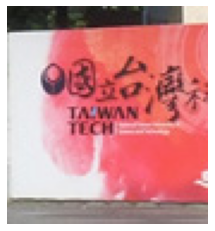

target


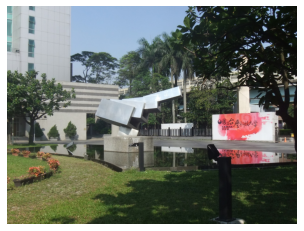

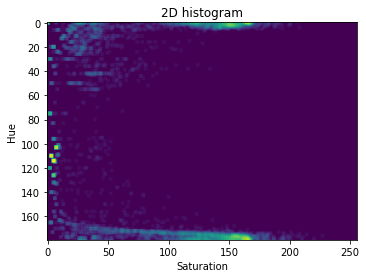

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import colors as colors

roi = cv2.imread('data/c.jpg')  # 色彩樣本(roi)
print('roi (small)'), plt.imshow(
    roi[:, :, ::-1]), plt.axis('off')  # 顯示色彩樣本(roi)
plt.show()
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)  # 轉換至HSV空間

target = cv2.imread('data/ntust.jpg')  # 讀取目標影像
hsvt = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)  # 轉換至HSV空間
print('target'), plt.imshow(target[:, :, ::-1]), plt.axis('off')  # 顯示目標影像
plt.show()

# 計算2D色彩分佈圖(2D直方圖)
# 取hsv的[0,1]兩通道
# 垂直方向是色相H(數值0-180,間隔為1), 水平方向是飽和度S(數值0-256間隔為1)
roihist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 將roi影像的2D色彩分佈圖拉到[0 255]的範圍
cv2.normalize(roihist, roihist, 0, 255, cv2.NORM_MINMAX)
roihist = cv2.blur(roihist, (3, 3))  # 模糊化
roihist = roihist+1  # 加1，避免roihist為0的地方，不能用log計算

# 由於2D色彩分佈圖的數值落差太大，使用對數影像，較能看出色彩集中的特性，
# 以下的 norm 是用來設定常態化的方式，這裡的LogNorm, 將數值取對數後，再常態化到適合的[0 1]顯示範圍
plt.imshow(roihist, norm=colors.LogNorm(), interpolation='bilinear')
plt.title('2D histogram'), plt.xlabel('Saturation'), plt.ylabel('Hue')
plt.show()

mask


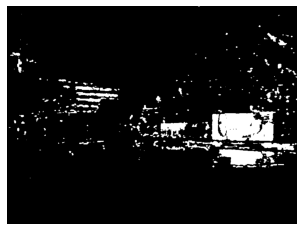

result


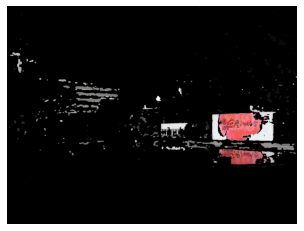

In [13]:
# 使用2D色彩分佈圖，計算目標影像每個像素接近此色彩分佈的機率值，獲得圖 dst
dst = cv2.calcBackProject([hsvt], [0, 1], roihist, [0, 180, 0, 256], 1)
# 產生5x5大小的圓形結構元素
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(dst, -1, disc, dst)
# 以50為門檻值，對dst做黑白二值化處理
ret, thresh = cv2.threshold(dst, 50, 255, 0)
# 二值化的黑白影像合併成3通道的彩色影像格式，當成遮罩
mask = cv2.merge((thresh, thresh, thresh))
print('mask'), plt.imshow(mask), plt.axis('off')
plt.show()
# 利用位元AND邏輯運算，res僅複製目標影像上，mask的白色的區域，也就是目標影像中，色彩與roi樣本近似的區域
res = cv2.bitwise_and(target, mask)
print('result'), plt.imshow(res[:, :, ::-1]), plt.axis('off')
plt.show()